**DEEP LEARNING FOR IDENTIFICATION OF PLANT LEAF DISEASES**

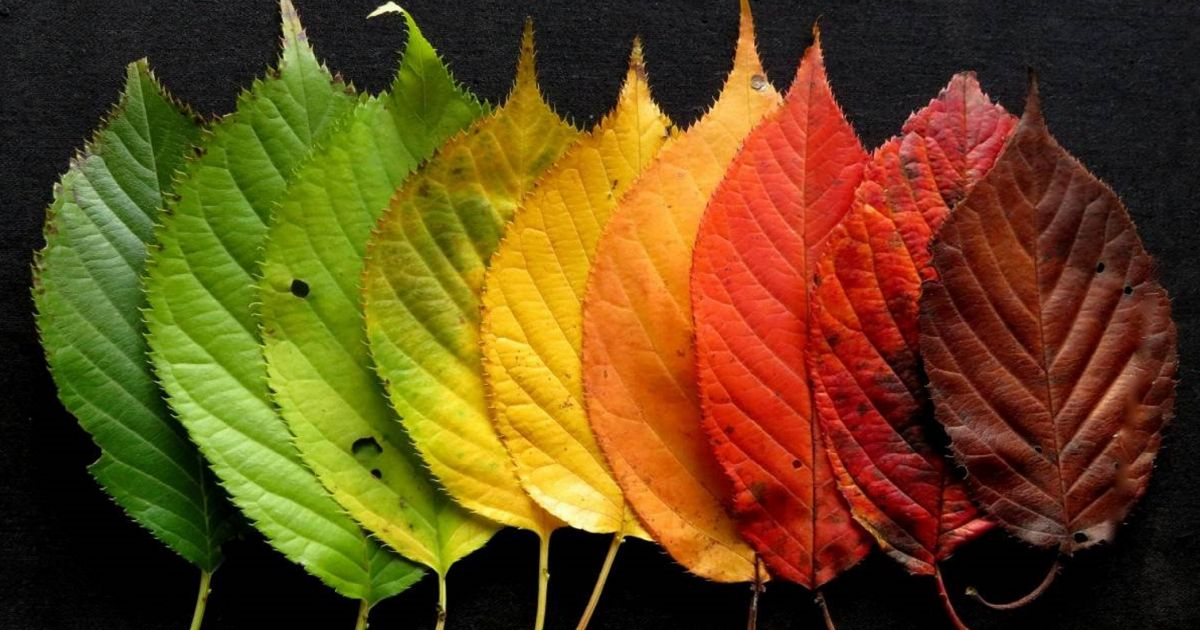

# **INTRODUCTION**

The agriculture sector in Kenya is essential, contributing 20% to the GDP and indirectly affecting another 27% through related sectors. It employs over 40% of the total population and 70% of rural inhabitants. Recognizing its importance in providing livelihoods and food, the Central Bank of Kenya launched the Survey of the Agriculture Sector in July 2022. This survey, alongside the CEOs and Market Perceptions Surveys, aims to generate frequent data to inform food supply, prices, and agricultural challenges, thereby supporting monetary policy decisions.

The Economic Survey of 2022 revealed a slowdown in agricultural growth, from 5.2% in 2020 to a 0.1% contraction in 2021, mainly due to unfavorable weather, reducing crop and livestock performance. Maize production fell from 42.1 million bags in 2020 to 36.7 million in 2021, with similar trends in potatoes,beans, coffee, wheat, and tea. Factors like rising input costs, leaf rust infestation, and land use shifts to real estate contributed to this decline. In 2022, the sector contracted further in the first three quarters.

The January 2023 Agriculture Sector Survey focused on recent trends in agricultural commodity prices and outputs across the country. It also assessed key food commodity availability. The survey's areas of interest included tracking commodity prices, assessing output and acreage, farm input usage, and factors affecting production.

The improvement of crop yields in Kenya through technology is a critical issue, given that small farmers, who own less than five acres each, constitute up to 75% of the country's agricultural workforce. These farmers traditionally rely on outdated methods and lack access to modern technologies that could enhance productivity and ease their labor.

# **CHALLENGES IN ENHANCING FARMING PRODUCTIVITY**

Small farmers face significant challenges due to their reliance on traditional farming methods.
There is a pressing need to integrate modern technology into agriculture to increase crop yields, improve income, and reduce labor hours.

Advantech's "Farming as Business" program aims to provide data and decision-making tools to farmers in East Africa.
They offer a smartphone app providing advanced weather forecasts, market trends, and information on soil types, fertilizers, and pesticides, helping farmers make data-driven decisions.

Agriculture, a cornerstone of human sustenance, has embraced technological advancements to bolster productivity and address challenges. In this vein, the proposed project delves into the realm of plant health, specifically the early identification of leaf diseases. Acknowledging the pivotal role of timely disease detection in safeguarding crop yield, we aim to leverage deep learning, employing a deep convolutional neural network (CNN). This venture is fueled by a dataset meticulously compiled by Arun Pandian J and Geetharamani Gopal

This project seeks to leverage the power of deep learning in the field of agriculture, specifically in the area of plant disease identification. 
We are working on developing a Convolutional Neural Network (CNN) model for Advantech's mobile app, aimed at helping farmers diagnose plant diseases through image recognition, which involves several steps. 


This model would leverage the power of machine learning and image processing to identify various plant diseases from photos taken by farmers. This model will help in the accurate and timely detection of plant diseases which plays a crucial role in ensuring food security and sustainability. With the advent of precision agriculture and the application of AI in this field, there is an opportunity to develop automated systems for early disease detection in crops. The successful completion of this project could significantly improve disease management in crops, leading to better agricultural practices and increased yields.

# **PROJECT OBJECTIVE**


The primary objective of this project is to develop a CNN model capable of accurately classifying different classes of potato plant leaf diseases, as well as distinguishing healthy leaves and unhealthy leaves. The project aims to create an efficient and reliable model that can be used for automated disease detection in agricultural application

# **METHODOLOGY**

Data Preprocessing: Perform additional image preprocessing as needed. Split the dataset into training, validation, and testing sets.

Model Development: Design and implement CNN. Experiment with different layer configurations and hyperparameters to optimize the model.

Model Training and Validation: Train the model using the training set. Validate and tune the model using the validation set to avoid overfitting.

Model Evaluation: Evaluate the model's performance on the test set using metrics like accuracy, precision, recall, and F1-score.

Deployment Strategy: Plan the integration of the model into a practical application using StreamLit where users will be able to upload images of their leaves and get a diagnosis of the plant.

Expected Outcomes: A highly accurate and reliable CNN model for the classification of plant leaf diseases. A comprehensive report detailing the model's performance, limitations, and potential applications.

# **IMPORT LIBRARIES**

In [1]:
# Loading data Library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Computational Libraries
import os
from PIL import Image
import numpy as np
import random

# Modelling Libraries
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

# Library to save models
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


# **LOAD THE DATA**

In [2]:
# dataset path
dataset_path = '/content/drive/MyDrive/Potatoes_with_Augmentation'

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the dataset using flow_from_directory for potatoes
potato_leaf_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

Found 2432 images belonging to 3 classes.


# **DATA PREPROCESSING**

## **Augmentation vs. No Augmentation**


Our dataset comprises two sets of images: one with augmentation and another without. In the absence of augmentation, images maintain their original form, resulting in limited dataset diversity and an elevated risk of overfitting.

In contrast, augmented images undergo transformations, promoting greater diversity, improved generalization to new data, and a reduction in overfitting.

The advantages of augmentation include enhanced generalization, increased model robustness across different patterns, and improved data efficiency by expanding the dataset without the need for additional data collection; a particularly valuable asset in resource-constrained scenarios. For our work, we will utilize images with augmentation.



# **EXPLORATORY DATA ANALYSIS**

### **Class Labels**

In [3]:
# Get the class labels and indices
class_labels = list(potato_leaf_generator.class_indices.keys())
class_indices = potato_leaf_generator.class_indices

print(class_labels)
print(class_indices)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


## **Visualize 3 images per class**

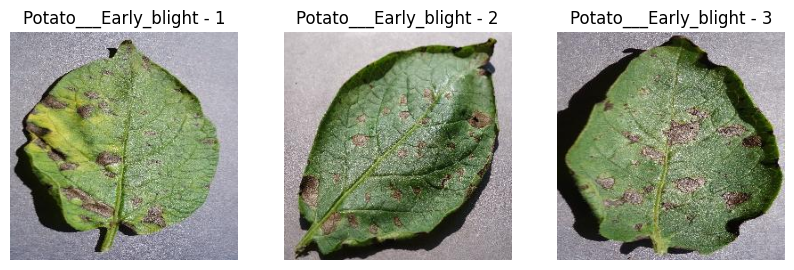

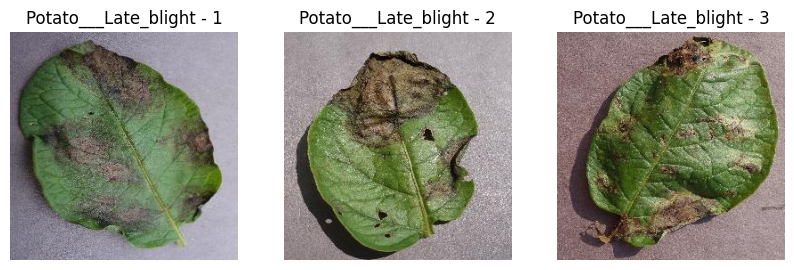

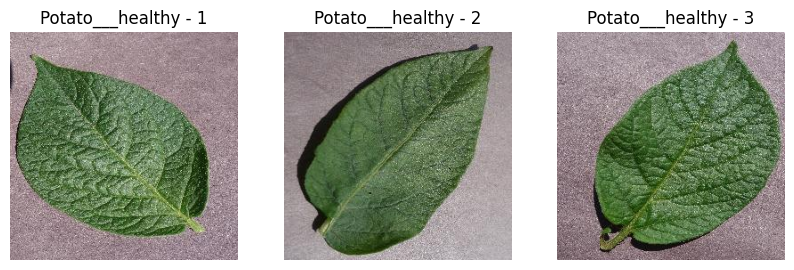

In [4]:
# Function to display images for a given class
def display_images(class_name, num_images=3):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.exists(class_path):
        print(f"Directory not found: {class_path}")
        return
    image_files = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, image_file in enumerate(image_files, 1):
        img_path = os.path.join(class_path, image_file)

        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        img = Image.open(img_path)

        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f'{class_name} - {i}')
        plt.axis('off')

    plt.show()

for class_label in class_labels:
    display_images(class_label, num_images=3)


## **Image Size Distribution**

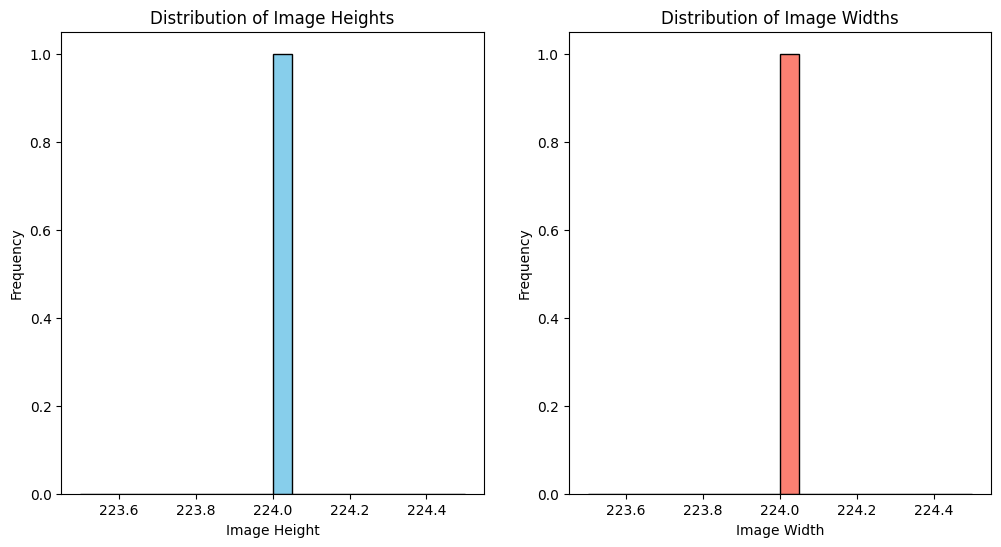

In [5]:
# Image sizes from a few samples
sample_images = potato_leaf_generator.next()[0]
image_heights = sample_images.shape[1]
image_widths = sample_images.shape[2]

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(image_heights, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Image Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_widths, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Image Width')
plt.ylabel('Frequency')

plt.show()

Observation:

The potato leaf images in our dataset have consistent dimensions, with the same height and width.

## **Aspect Ratio**

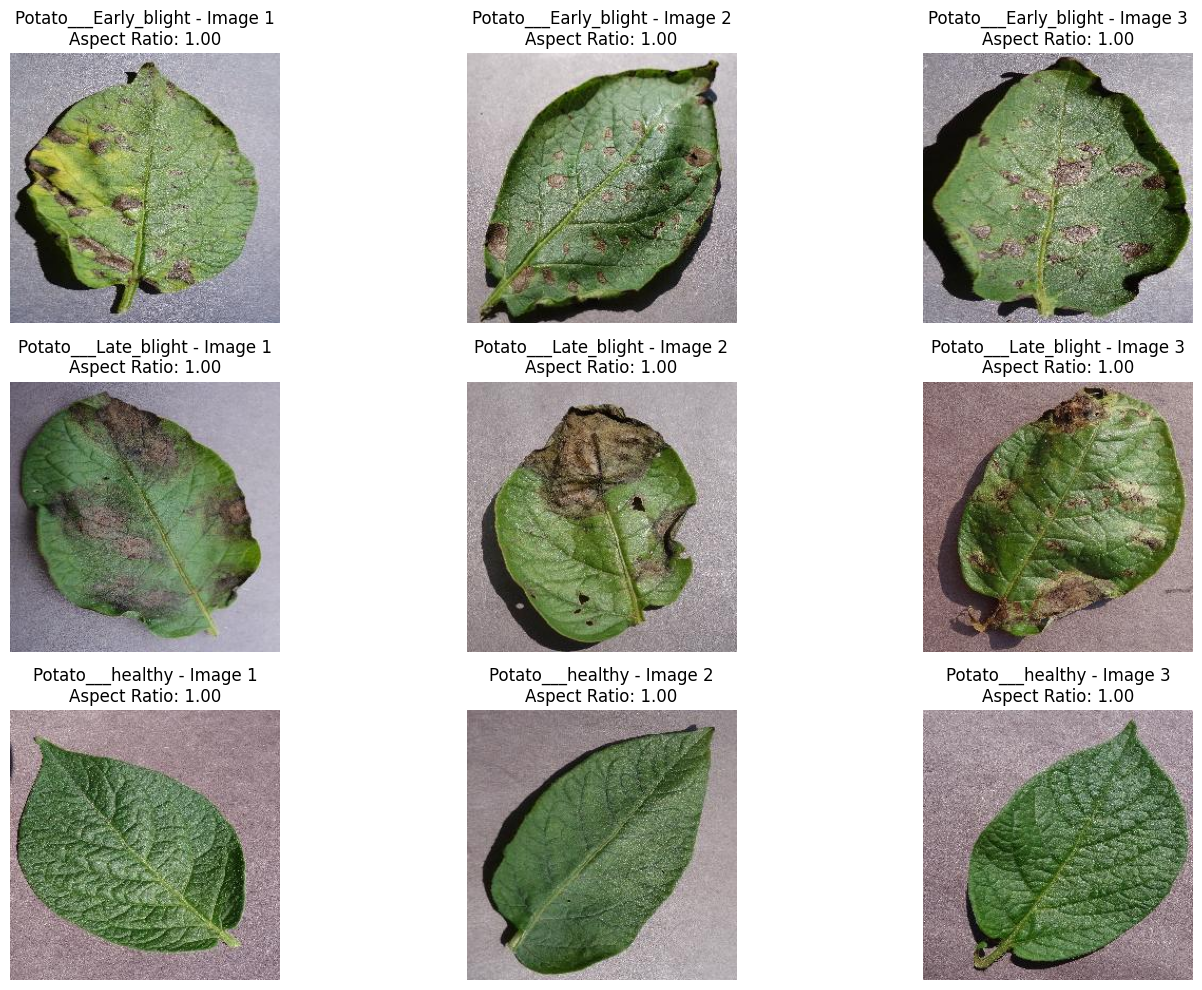

In [6]:
# Function to display aspect ratio distribution for multiple images in each class
def display_aspect_ratio_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Calculate aspect ratio
            aspect_ratio = img.shape[0] / img.shape[1]

            # Plot aspect ratio distribution
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(img)  # Show the image
            plt.title(f'{class_label} - Image {j + 1}\nAspect Ratio: {aspect_ratio:.2f}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_aspect_ratio_for_classes()


Observation:

With an aspect ratio of 1.0, the images have the same height and width. To confirm this further we will check the shape of the whole dataset. There is no need to resize or reshape the images.


## **Colour Distribution of the Images**

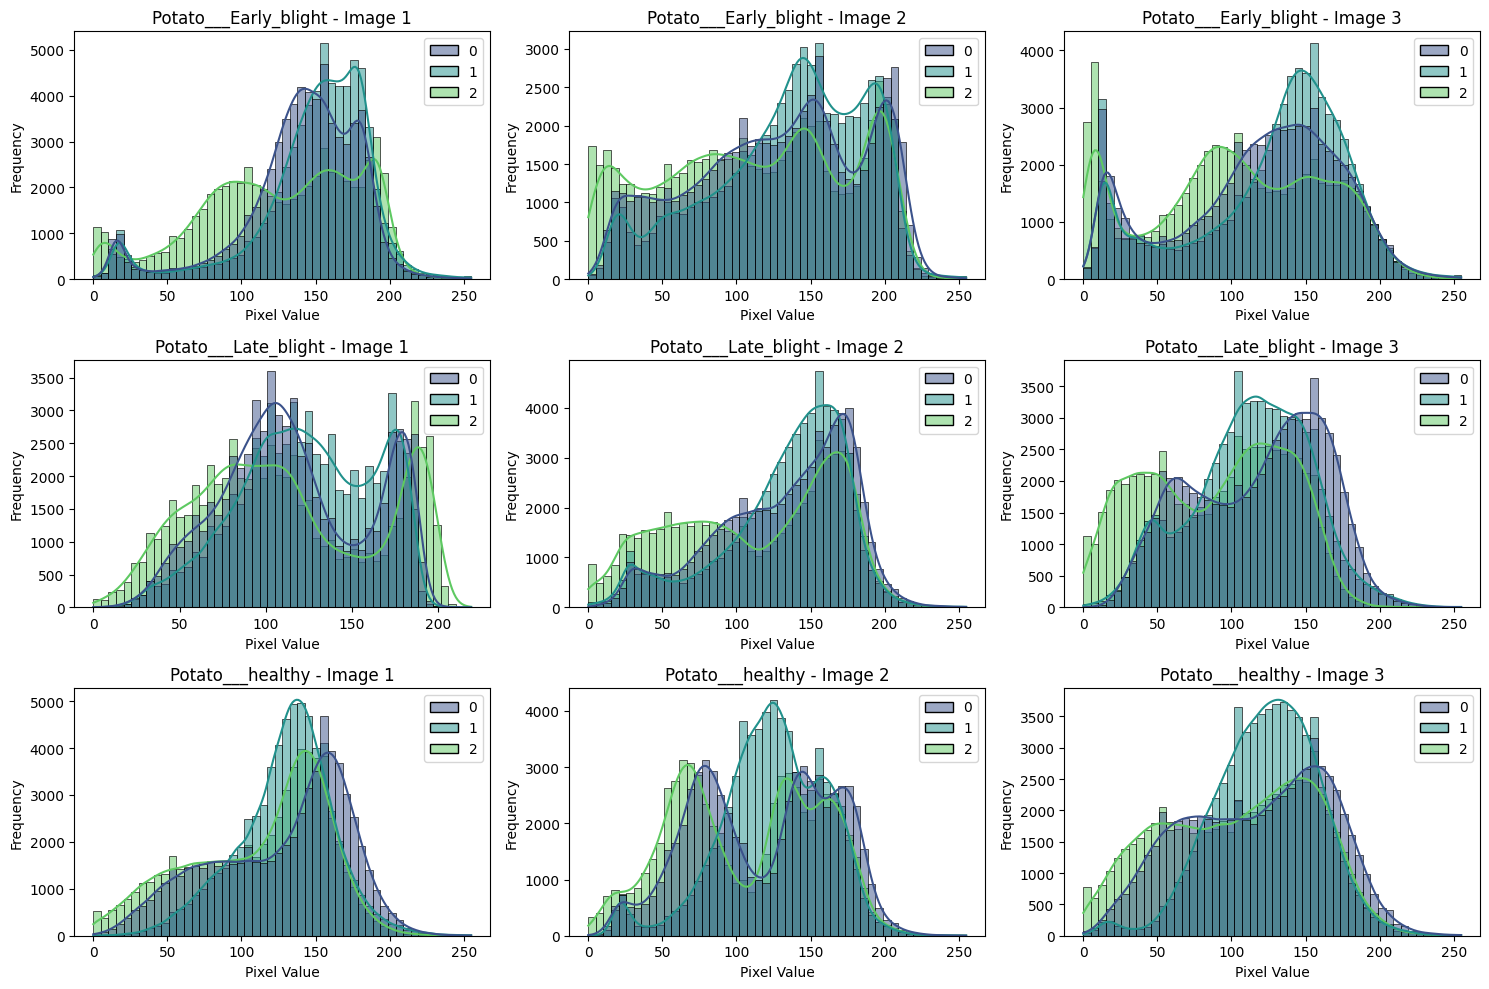

In [7]:
# Function to display color distribution for multiple images in each class
def display_color_distribution_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Reshape the image for color distribution
            flattened_image = img.reshape(-1, img.shape[-1])

            # Plot color distribution
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
            sns.histplot(flattened_image, bins=50, kde=True, palette='viridis')
            plt.title(f'{class_label} - Image {j + 1}')
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

display_color_distribution_for_classes()

Observation:

The diverse distributions across different classes suggest variations in color characteristics and patterns unique to each class. The presence of right or left skewness and different peaks indicates the diversity of color compositions within our dataset.

We will analyze the RGB distributions in various images to check if there's a consistent presence of green, yellow, and brown tints as is in our images.




<ipython-input-8-e35ee43e5170>:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


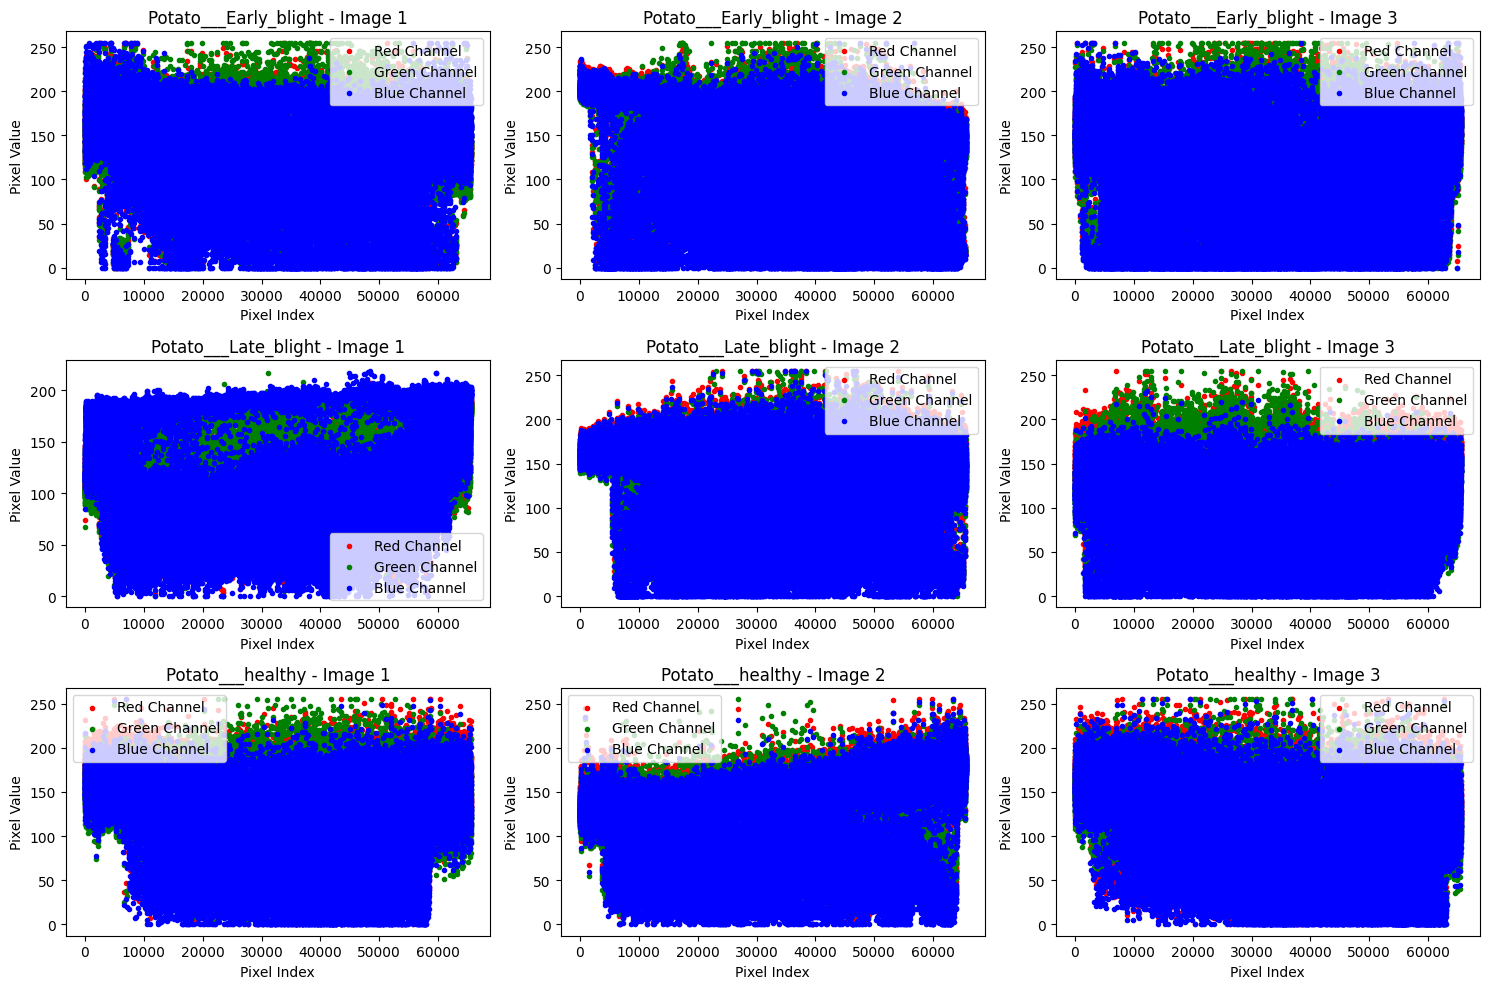

In [8]:
# Function to display RGB distributions for multiple images in each class
def display_rgb_scatter_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Get RGB values for each pixel
            red_values = img[:, :, 0].flatten()
            green_values = img[:, :, 1].flatten()
            blue_values = img[:, :, 2].flatten()

            # Plot RGB distributions using scatter plots
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)

            plt.scatter(range(len(red_values)), red_values, color='red', marker='.', label='Red Channel')
            plt.scatter(range(len(green_values)), green_values, color='green', marker='.', label='Green Channel')
            plt.scatter(range(len(blue_values)), blue_values, color='blue', marker='.', label='Blue Channel')

            plt.title(f'{class_label} - Image {j + 1}')
            plt.xlabel('Pixel Index')
            plt.ylabel('Pixel Value')
            plt.legend()

    plt.tight_layout()
    plt.show();

display_rgb_scatter_for_classes()

Observation:

The blue channel dominance aligns with the common color characteristics of green leaves, as chlorophyll, the primary pigment responsible for photosynthesis, absorbs mostly in the blue part of the spectrum.


## **Analyze class distribution**

In [9]:
# Get the count of images for each class
class_counts = potato_leaf_generator.classes
class_labels = potato_leaf_generator.class_indices.keys()

# Create a dictionary mapping class labels to counts
class_counts_dict = {label: count for label, count in zip(class_labels, np.bincount(class_counts))}
class_counts_dict

{'Potato___Early_blight': 800,
 'Potato___Late_blight': 832,
 'Potato___healthy': 800}

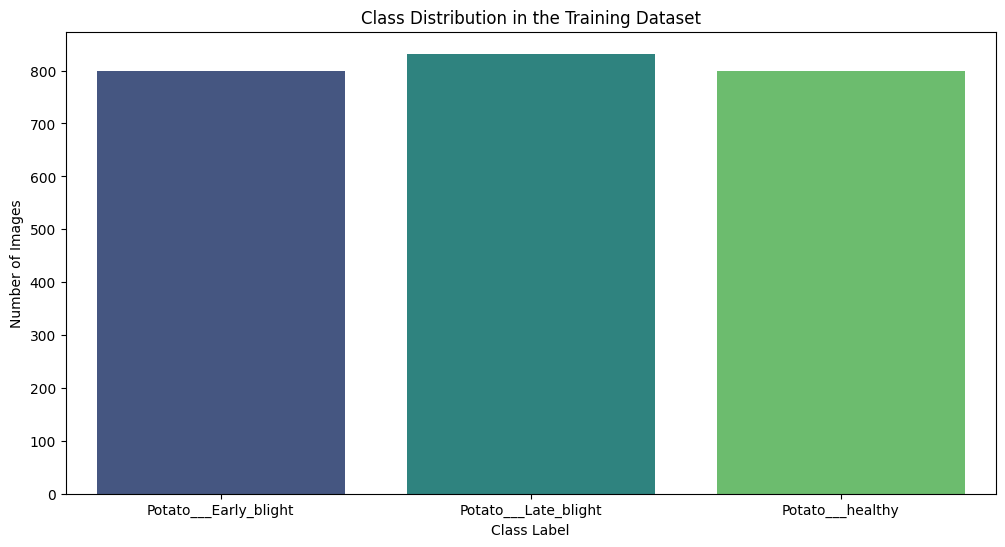

In [10]:
# Visualize the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts_dict.keys()), y=list(class_counts_dict.values()), palette='viridis')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Training Dataset')
plt.xticks(rotation='horizontal')
plt.show()

Observation:

Our dataset has a well-balanced distribution among the classes:

Potato___Early_blight: 800 images
Potato___Late_blight: 832 images
Potato___healthy: 800 images

This balanced representation provides a good foundation for training our model to recognize various aspects of early blight, late blight, and healthy potato leaves.

# **MODEL ARCHITECTURE**

## **Check GPU Availability**

GPU is a stronger processor for image classification models compared to CPU.

In [11]:
# Number of GPUs
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


## **Train and Validation Split**

In [12]:
# Set batch size and image size
batch_size = 32
image_size = (224, 224)

# Create training data
training_data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Create validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2432 images belonging to 3 classes.
Found 607 images belonging to 3 classes.


## **Basic Model - CNN**

Our CNN model will use ReLU to introduce non-linearity and capture complex patterns in hidden layers and a Softmax output layer to convert raw scores into class probabilities for multi-class classification.

In [13]:
# CNN model
num_classes = 3

# Generate the model
base_cnn_model = Sequential()
base_cnn_model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
base_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
base_cnn_model.add(Flatten())
base_cnn_model.add(Dense(128, activation='relu'))
base_cnn_model.add(Dense(num_classes, activation='softmax'))


base_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
base_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 50468227 (192.52 MB)
Trainable params: 50468227 (192.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [14]:
# Train the model
history = base_cnn_model.fit(
    training_data_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
76/76 [==============================] - 265s 3s/step - loss: 3.0048 - accuracy: 0.6904 - val_loss: 0.3790 - val_accuracy: 0.8287
Epoch 2/10
76/76 [==============================] - 231s 3s/step - loss: 0.3122 - accuracy: 0.8820 - val_loss: 0.2634 - val_accuracy: 0.9193
Epoch 3/10
76/76 [==============================] - 251s 3s/step - loss: 0.2032 - accuracy: 0.9243 - val_loss: 0.2693 - val_accuracy: 0.8715
Epoch 4/10
76/76 [==============================] - 229s 3s/step - loss: 0.2118 - accuracy: 0.9116 - val_loss: 0.2410 - val_accuracy: 0.8979
Epoch 5/10
76/76 [==============================] - 228s 3s/step - loss: 0.1661 - accuracy: 0.9383 - val_loss: 0.2239 - val_accuracy: 0.9176
Epoch 6/10
76/76 [==============================] - 234s 3s/step - loss: 0.1250 - accuracy: 0.9502 - val_loss: 0.2697 - val_accuracy: 0.8962
Epoch 7/10
76/76 [==============================] - 244s 3s/step - loss: 0.1215 - accuracy: 0.9531 - val_loss: 0.2232 - val_accuracy: 0.9160
Epoch 8/10
76

### **Visualize Training Loss and Training Accuracy**

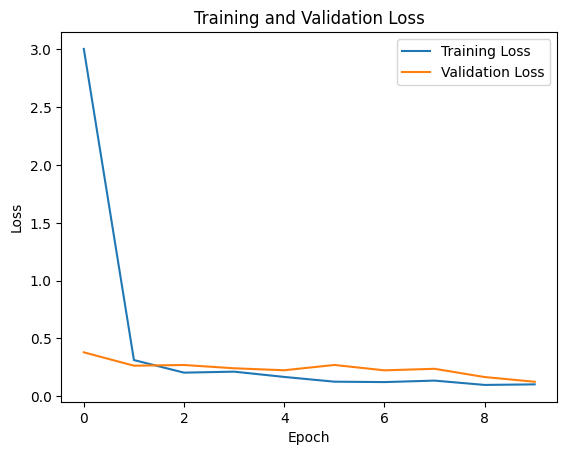

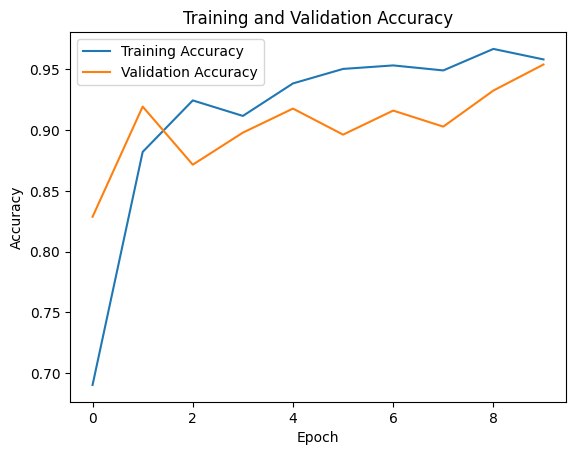

In [15]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

### **Evaluate the Basic CNN model**



In [16]:
# Evaluate the model
evaluation_results = base_cnn_model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(evaluation_results[1] * 100))
print("Validation Loss: {:.4f}".format(evaluation_results[0]))


19/19 [==============================] - 20s 1s/step - loss: 0.1140 - accuracy: 0.9654
Validation Accuracy: 96.54%
Validation Loss: 0.1140


Observation:

Our base CNN model demonstrated an impressive 96.54% validation accuracy in distinguishing various potato leaf diseases. We aim to enhance our model by building a deeper CNN to pursue an even higher accuracy score.













## **Deep CNN Model**

This is a deep convolutional neural network with multiple convolutional, pooling, dropout, and dense layers.

In [17]:
deep_cnn_model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),,
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
deep_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
deep_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 55, 55, 64)       

In [18]:
# Train the model
deep_cnn_history = deep_cnn_model.fit(
        training_data_generator,
        steps_per_epoch = training_data_generator.n // training_data_generator.batch_size,
        epochs = 10,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

Epoch 1/10
76/76 [==============================] - 402s 5s/step - loss: 1.0797 - accuracy: 0.4137 - val_loss: 1.0464 - val_accuracy: 0.3976
Epoch 2/10
76/76 [==============================] - 382s 5s/step - loss: 0.5198 - accuracy: 0.7648 - val_loss: 0.6156 - val_accuracy: 0.7222
Epoch 3/10
76/76 [==============================] - 364s 5s/step - loss: 0.2806 - accuracy: 0.8943 - val_loss: 0.4879 - val_accuracy: 0.8177
Epoch 4/10
76/76 [==============================] - 373s 5s/step - loss: 0.2399 - accuracy: 0.9034 - val_loss: 0.2604 - val_accuracy: 0.8802
Epoch 5/10
76/76 [==============================] - 368s 5s/step - loss: 0.2044 - accuracy: 0.9202 - val_loss: 0.3504 - val_accuracy: 0.8698
Epoch 6/10
76/76 [==============================] - 368s 5s/step - loss: 0.1886 - accuracy: 0.9243 - val_loss: 0.2835 - val_accuracy: 0.8854
Epoch 7/10
76/76 [==============================] - 366s 5s/step - loss: 0.1887 - accuracy: 0.9248 - val_loss: 0.3511 - val_accuracy: 0.8212
Epoch 8/10
76

### **Visualize Training Loss and Training Accuracy**

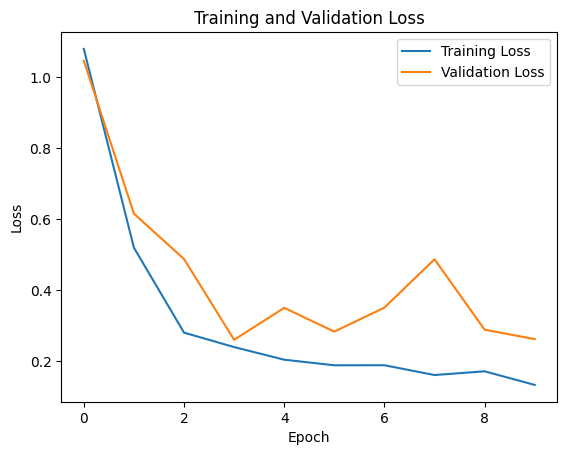

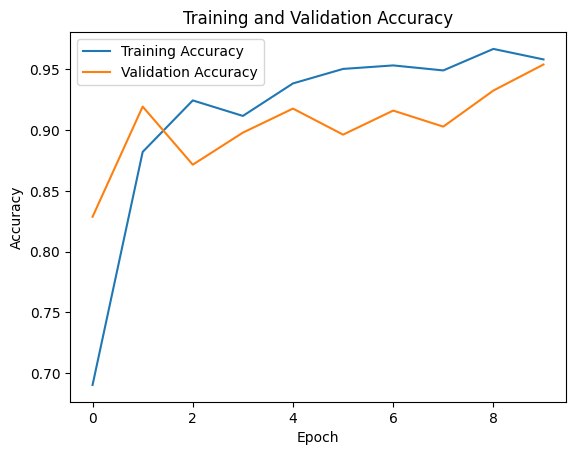

In [22]:
# Plot training loss
plt.plot(deep_cnn_history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(deep_cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

### **Evaluate the Deep CNN model**

In [24]:
# Evaluate the model
evaluation_results = deep_cnn_model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(evaluation_results[1] * 100))
print("Validation Loss: {:.4f}".format(evaluation_results[0]))


19/19 [==============================] - 28s 1s/step - loss: 0.2601 - accuracy: 0.8880
Validation Accuracy: 88.80%
Validation Loss: 0.2601


Observation:

The base CNN model achieved a higher validation accuracy of 96.54% compared to the deep CNN model with a validation accuracy of 88.80%.The deep CNN model has a more complex architecture with more layers, potentially providing the capacity to learn more intricate patterns from the data.

## **GoogleNet's Inception Model with Transfer Learning**


This method ensures efficient feature extraction with its inception modules, reducing parameters for computational efficiency. Its multi-pathway design captures diverse features, providing a broader receptive field and enabling effective representation learning.

By augmenting this base with a Global Average Pooling layer and a Dense layer employing softmax activation for classification, the model adapts its knowledge to the task of identifying potato leaf diseases.

An EarlyStopping callback is implemented to curb overfitting and ensure optimal generalization during the training process.

### **Define EarlyStopping callback**

In [19]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [20]:
# Create InceptionV3 model for transfer learning
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_inception_model.layers:
    layer.trainable = False

# Create InceptionV3 base with custom layers
inception_model = Sequential([
    base_inception_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 22065443 (84.17 MB)
Trainable params: 262659 (1.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [29]:
# Train the model
history_inception = inception_model.fit(
    training_data_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks = [early_stopping]
)

Epoch 1/10
76/76 [==============================] - 494s 7s/step - loss: 0.1086 - accuracy: 0.9597 - val_loss: 0.2397 - val_accuracy: 0.9077
Epoch 2/10
76/76 [==============================] - 437s 6s/step - loss: 0.1200 - accuracy: 0.9593 - val_loss: 0.3728 - val_accuracy: 0.8715
Epoch 3/10
76/76 [==============================] - 501s 7s/step - loss: 0.1035 - accuracy: 0.9613 - val_loss: 0.2011 - val_accuracy: 0.9226
Epoch 4/10
76/76 [==============================] - 489s 6s/step - loss: 0.1142 - accuracy: 0.9581 - val_loss: 0.1955 - val_accuracy: 0.9325
Epoch 5/10
76/76 [==============================] - 486s 6s/step - loss: 0.0847 - accuracy: 0.9679 - val_loss: 0.1566 - val_accuracy: 0.9473
Epoch 6/10
76/76 [==============================] - 482s 6s/step - loss: 0.0806 - accuracy: 0.9679 - val_loss: 0.2456 - val_accuracy: 0.9209
Epoch 7/10
76/76 [==============================] - 431s 6s/step - loss: 0.0862 - accuracy: 0.9696 - val_loss: 0.2004 - val_accuracy: 0.9374
Epoch 8/10
76

### **Visualize Training Loss and Training Accuracy**

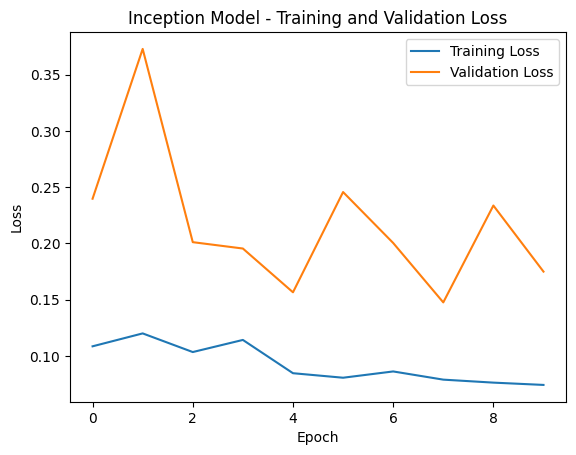

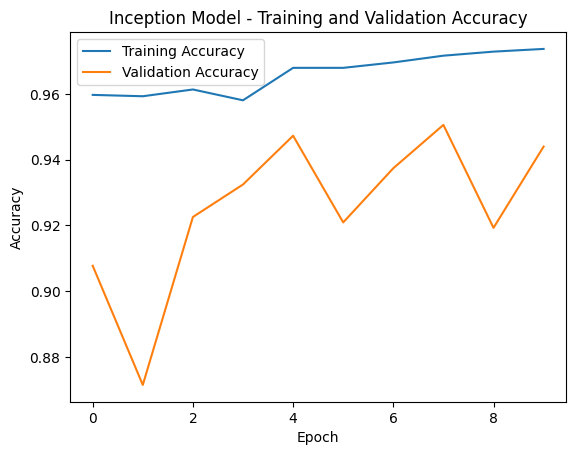

In [30]:
# Plot training loss
plt.plot(history_inception.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.title('Inception Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Inception Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Evaluate the Inception model**

In [32]:
# Evaluate the model
evaluation_results_inception = inception_model.evaluate(validation_generator)

print("Validation Accuracy: {:.2f}%".format(evaluation_results_inception[1] * 100))
print("Validation Loss: {:.4f}".format(evaluation_results_inception[0]))

19/19 [==============================] - 110s 6s/step - loss: 0.1664 - accuracy: 0.9357
Validation Accuracy: 93.57%
Validation Loss: 0.1664


# **Save the best performing model**

Given the models performances we will save the base cnn model s it has a higher accuracy and the lowest validation loss in its performance.

In [33]:
# Save the model
base_cnn_model.save('potatoes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **CONCLUSION**

**Base CNN Model:**


The Base CNN Model has delivered outstanding results by achieving a remarkably high validation accuracy of 96.54% in the intricate task of classifying potato leaf diseases. This significant accuracy underscores the model's proficiency in accurately identifying and categorizing diverse instances of potato leaf ailments. The achievement of such a high accuracy rate is indicative of the model's robust ability to detect abnormal patterns and features associated with different disease states in potato plants.

While the overall performance is promising, it is crucial to acknowledge and address the observed variations in accuracy across distinct disease classes. The model's ability to correctly identify specific diseases might be subject to fluctuations, necessitating a closer examination of its performance at a granular level. Understanding and mitigating these variations are pivotal steps in ensuring the model's reliability across the spectrum of potato leaf diseases.

**Inception Model:**

The Inception Model has demonstrated commendable performance, achieving a validation accuracy of 93.57% in classifying potato leaf diseases. This accuracy signifies the model's effectiveness in extracting distinctive features relevant to disease patterns, albeit slightly lower compared to the Base CNN Model. The marginal difference in accuracy suggests that the Inception Model could potentially offer an alternative and complementary approach to feature extraction.

To further enhance the Inception Model's accuracy, the recommendation is to embark on a fine-tuning process. Fine-tuning involves adjusting the model's hyperparameters or training on additional data to optimize its performance. This targeted optimization process aims to narrow the accuracy gap and potentially surpass the performance of the Base CNN Model. By understanding these challenges, the fine-tuning process can be more informed, addressing the root causes of misclassifications and bolstering the model's overall predictive capability.

**Deep CNN Model:**

The Deep CNN Model,  unfortunately, demonstrates a notable drop in accuracy to 88.80%. The deep CNN model might have struggled to generalize well to the validation data due to its increased complexity, leading to a slightly lower performance compared to the other models. In some cases, increasing the dataset size could help improve the deep CNN model's performance.


# **RECOMMENDATION**

In enhancing the potato leaf disease detection project, we strongly recommend the inclusion of a non-leaf class to address scenarios where the input may not be a diseased leaf. This addition will significantly improve the model's versatility, allowing it to distinguish non-leaf objects effectively. To implement this, it is crucial to design a diverse dataset representing various non-leaf instances and modify the model architecture to accommodate the new class. Fine-tuning the model on this augmented dataset will enable it to detect features associated with non-leaf objects. This strategic expansion will not only broaden the model's applicability but also contribute to a more comprehensive understanding of the broader context in which potato leaf disease detection operates.

Diversifying the negative class data is a critical step in refining the model's ability to distinguish features specific to potatoes, thereby minimizing the risk of misclassifying non-potato images. By incorporating a broader range of negative examples, the model gains exposure to a more comprehensive set of non-potato instances. This diversification facilitates a more nuanced understanding of what constitutes a non-potato object, reducing the chances of false positives and enhancing the model's overall robustness. The inclusion of varied non-potato images ensures that the model can better discriminate between potato-related features and those unrelated to the domain, ultimately improving the accuracy and reliability of the potato leaf disease detection application.